<h1 style="text-align: center;">Arbitrages économiques dans le financement des jeunes entreprises innovantes : une comparaison entre l’Île-de-France et la région PACA 📊💡</h1>

<br>

## Packages :  

In [165]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # visu graphique
import folium # Pour la cartographie 
from itertools import cycle
import branca # legende carto (pour le html)

<br>

## Chargement des données : 

In [173]:
data = pd.read_csv('data_cir.csv', delimiter=';')

data.head(3)

,Dispositif,Type de structure,Année d'agrément,Type,Désignation,Sigle,Activité,Localisation,Début d'agrément,Fin d'agrément,...,Région,Pays,Code commune (France),Code de l'unité urbaine (France),Code du département (France),Code de l'académie (France),Code de la région (France),Code ISO du Pays,Géolocalisation,type
0,CIR,Bureaux de style agréés auxquels peuvent faire...,"2009,2010",Organisme,VALTEX GROUP,NaN,Textile Habillement Cuir,Auvergne-Rhône-Alpes>Lyon>Rhône>Valsonne,2009,2010,...,Auvergne-Rhône-Alpes,France,69254,CR69254,D069,A10,R84,FR,"45.946942199, 4.42166698424",BDS
1,CIR,Bureaux de style agréés auxquels peuvent faire...,"2009,2010",Organisme,RUIZ,NaN,Textile Habillement Cuir,Auvergne-Rhône-Alpes>Lyon>Loire>Roanne,2009,2010,...,Auvergne-Rhône-Alpes,France,42187,UU42502,D042,A10,R84,FR,"46.0449112487, 4.0797045647",BDS
2,CIR,Bureaux de style agréés auxquels peuvent faire...,"2009,2010",Organisme,VIRO,NaN,Prêt à porter féminin,Provence-Alpes-Côte d'Azur>Aix-Marseille>Alpes...,2009,2010,...,Provence-Alpes-Côte d'Azur,France,04094,UU04102,D004,A02,R93,FR,"43.7676102812, 5.86495046225",BDS


<br>

## Traitement :

#### Renommer la colonne et transformer les éléments de *Annee* en une liste

In [175]:
data.rename(columns={data.columns[2]: 'Annee'}, inplace=True)

data['Annee'] = data['Annee'].str.split(',')

#### Création d'un nouveau dataframe avec une ligne pour chaque entreprise et année

In [177]:
data_explode_annee = data.explode('Annee')

data_explode_annee['Annee'] = pd.to_numeric(data_explode_annee['Annee'], errors='coerce')

data_explode_annee.head(3)

,Dispositif,Type de structure,Annee,Type,Désignation,Sigle,Activité,Localisation,Début d'agrément,Fin d'agrément,...,Région,Pays,Code commune (France),Code de l'unité urbaine (France),Code du département (France),Code de l'académie (France),Code de la région (France),Code ISO du Pays,Géolocalisation,type
0,CIR,Bureaux de style agréés auxquels peuvent faire...,2009,Organisme,VALTEX GROUP,NaN,Textile Habillement Cuir,Auvergne-Rhône-Alpes>Lyon>Rhône>Valsonne,2009,2010,...,Auvergne-Rhône-Alpes,France,69254,CR69254,D069,A10,R84,FR,"45.946942199, 4.42166698424",BDS
0,CIR,Bureaux de style agréés auxquels peuvent faire...,2010,Organisme,VALTEX GROUP,NaN,Textile Habillement Cuir,Auvergne-Rhône-Alpes>Lyon>Rhône>Valsonne,2009,2010,...,Auvergne-Rhône-Alpes,France,69254,CR69254,D069,A10,R84,FR,"45.946942199, 4.42166698424",BDS
1,CIR,Bureaux de style agréés auxquels peuvent faire...,2009,Organisme,RUIZ,NaN,Textile Habillement Cuir,Auvergne-Rhône-Alpes>Lyon>Loire>Roanne,2009,2010,...,Auvergne-Rhône-Alpes,France,42187,UU42502,D042,A10,R84,FR,"46.0449112487, 4.0797045647",BDS


<br>

## Evolution du nombre de CIR par année : 

In [179]:
data_explode_annee_france = data_explode_annee.copy()

data_explode_annee_france = data_explode_annee_france[(data_explode_annee['Annee'] <= 2023)]

data_counts = data_explode_annee_france.groupby('Annee').size().reset_index(name='Nombre de CIR')

print(data_counts)

    Annee  Nombre de CIR
0    2009           1832
1    2010           3512
2    2011           4822
3    2012           5218
4    2013           5632
5    2014           5562
6    2015           5359
7    2016           5472
8    2017           5450
9    2018           5589
10   2019           5459
11   2020           5266
12   2021           5274
13   2022           5891
14   2023           5590


#### Graphique :

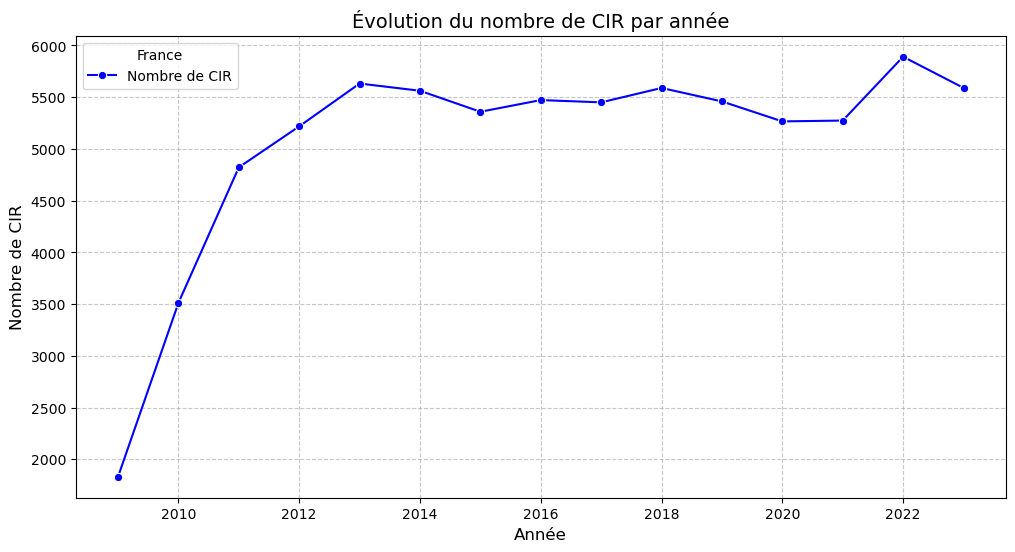

In [181]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_counts, x='Annee', y='Nombre de CIR', marker='o', color='blue', label='Nombre de CIR')

# Ajouter les titres et les axes
plt.title("Évolution du nombre de CIR par année", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre de CIR", fontsize=12)
plt.legend(title="France")
plt.grid(visible=True, linestyle="--", alpha=0.7)

plt.show() 

<br>

 ## Filtre sur les régions Ile de France et PACA :

In [183]:
data_explode_annee = data_explode_annee[(data_explode_annee['Région'].isin(["Provence-Alpes-Côte d'Azur", "Île-de-France"])) & (data_explode_annee['Annee'] <= 2023) & (data_explode_annee['Type'] == 'Organisme')]

data_explode_annee['Région'] = data_explode_annee['Région'].replace({
    "Île-de-France": "IDF",
    "Provence-Alpes-Côte d'Azur": "PACA"
})

#### Répartition en du nombre d’entreprises éligibles au CIR entre la Région IDF et PACA de 2009 à 2023

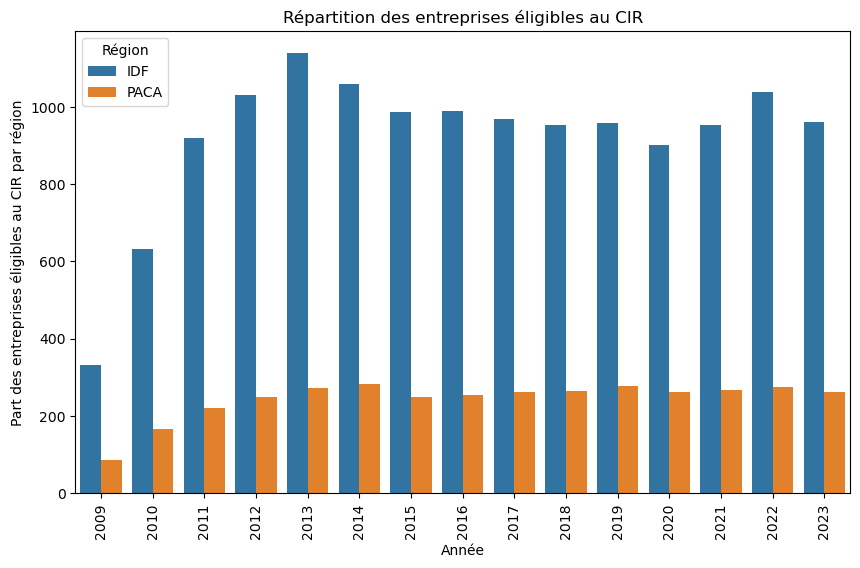

In [185]:
data_region_annee = data_explode_annee.groupby(['Annee', 'Région']).size().reset_index(name='count')

# Création du graphique
plt.figure(figsize=(10, 6))
sns.barplot(data=data_region_annee, x='Annee', y='count', hue='Région')
plt.title("Répartition des entreprises éligibles au CIR")
plt.xlabel("Année")
plt.ylabel("Part des entreprises éligibles au CIR par région")
plt.xticks(rotation=90)
plt.legend(title="Région")

plt.show()  

#### Répartition en pourcentage du nombre d’entreprises éligibles au CIR entre la Région IDF et PACA de 2009 à 2023 (Total PACA + IDF = 100%)

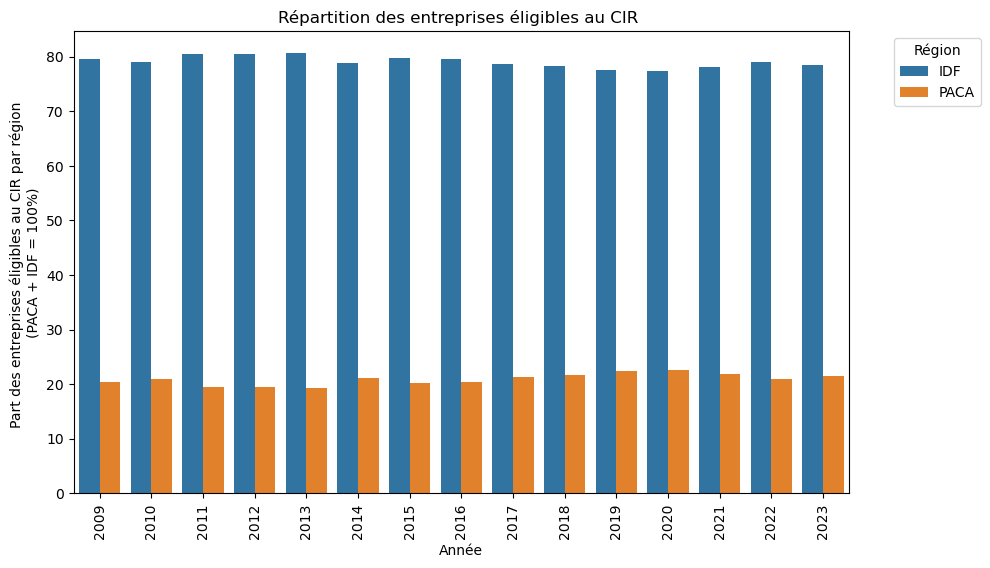

In [187]:

data_region_annee_pourcentage = data_region_annee.copy()        
   
# Calculer la somme des 'count' pour chaque année
somme_count_par_annee_pourcentage = data_region_annee_pourcentage.groupby('Annee')['count'].transform('sum')

# Ajouter une nouvelle colonne 'Pourcentage' au DataFrame
data_region_annee_pourcentage['Pourcentage'] = (data_region_annee_pourcentage['count'] / somme_count_par_annee_pourcentage) * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=data_region_annee_pourcentage, x='Annee', y='Pourcentage', hue='Région')
plt.title("Répartition des entreprises éligibles au CIR ")
plt.xlabel("Année")
plt.ylabel("Part des entreprises éligibles au CIR par région \n(PACA + IDF = 100%)")
plt.xticks(rotation=90)
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()  

##### On observe que, malgré une augmentation du nombre de CIR autour de 2010, la répartition reste inchangée entre les régions Île-de-France et PACA. L'Île-de-France reçoit quatre fois plus que la PACA sur toute la période.

<br>

## Par Région et Activité :

In [189]:
    
# Remplacer les valeurs NaN ou vides par 'Non renseigné'
data_explode_annee['Activité'] = data_explode_annee['Activité'].fillna('Non renseigné')
    

# Compter le nombre de lignes pour chaque 'Région' et chaque 'Categorie'
data_region_activite = data_explode_annee.groupby(['Activité', 'Région']).size().reset_index(name='count')
  
# Liste des 'Activité' uniques
unique_activite = data_region_activite['Activité'].unique()

# Boucle pour vérifier pour chaque activité
for activite in unique_activite:
    # Filtrer les données pour la région IDF et PACA pour l'activité en cours
    IDF_activite = data_region_activite[(data_region_activite['Activité'] == activite) & (data_region_activite['Région'] == 'IDF')]
    PACA_activite = data_region_activite[(data_region_activite['Activité'] == activite) & (data_region_activite['Région'] == 'PACA')]
    # Remplacer les valeurs vides par des lignes avec un 'count' de 0
    if IDF_activite.empty:
        IDF_activite = pd.DataFrame({'Activité': [activite], 'Région': ['IDF'], 'count': [0]})
    if PACA_activite.empty:
        PACA_activite = pd.DataFrame({'Activité': [activite], 'Région': ['PACA'], 'count': [0]})

    if PACA_activite.iloc[0, 2] > IDF_activite.iloc[0, 2]:
        print(activite + ": \n PACA -> " + str(PACA_activite.iloc[0, 2]) + "\n IDF -> " + str(IDF_activite.iloc[0, 2]))


Acoustique: 
 PACA -> 76
 IDF -> 33
Botanique: 
 PACA -> 28
 IDF -> 2


##### La région PACA a obtenu plus de CIR uniquement dans les domaines de l'*acoustique* et de la *botanique*.

#### En Filtrant sur des entreprises distinctes :

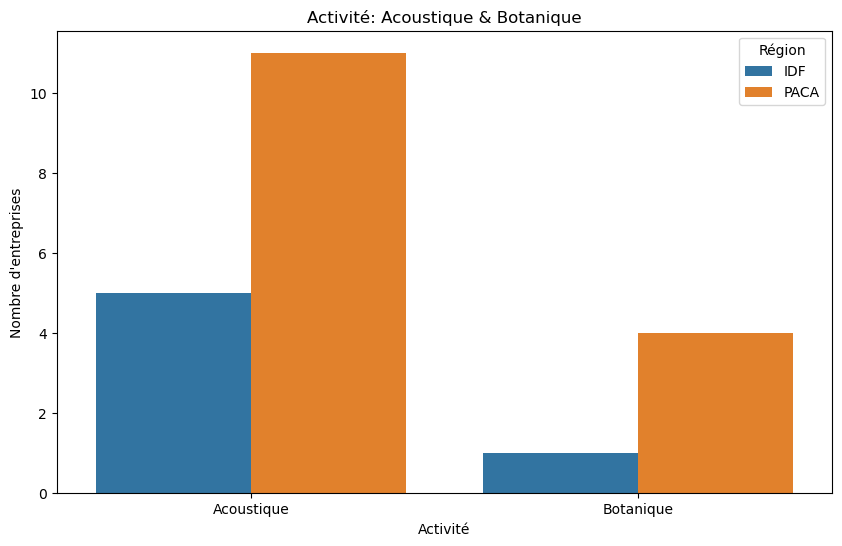

In [191]:

data_count_entreprise = data_explode_annee.copy()

# Conserve que les colonnes d'interet
data_count_entreprise = data_count_entreprise[['Désignation', 'Activité','Région','Géolocalisation']]

# Drop les doublons
data_count_entreprise = data_count_entreprise.drop_duplicates()

# Focus sur les 'Activité': 'Botanique' & 'Acoustique'
data_count_entreprise_focus = data_count_entreprise.copy()

# Select 'Acoustique' & 'Botanique'
data_count_entreprise_focus = data_count_entreprise_focus[data_count_entreprise_focus['Activité'].isin(['Acoustique', 'Botanique'])]

# Group by 'Région' & 'Activité'
data_count_entreprise_focus = data_count_entreprise_focus.groupby(['Région','Activité']).size().reset_index(name='count')

# Barplot 'Acoustique' et 'Botanique' entreprise unique

plt.figure(figsize=(10, 6))
sns.barplot(data = data_count_entreprise_focus, x='Activité', y='count', hue='Région')
plt.title("Activité: Acoustique & Botanique")
plt.xlabel("Activité")
plt.ylabel("Nombre d'entreprises")
plt.legend(title="Région")

plt.show()  

#### Nombre d'activités distinctes :

In [193]:
nombre_activites_distinctes = data["Activité"].nunique()
print(nombre_activites_distinctes)

55


#### Il y a trop de catégories différentes on va regrouper par similitudes.

<br>

## Regroupement par catégories :

In [195]:
data_categorie = data_explode_annee.copy()


# Définition du regroupement
def categoriser_activite(activite):
    # Catégorie 1 : Sciences et technologies
    if ('Mathématiques' in activite or 'Physique' in activite or 'Chimie' in activite or 
        'Biologie' in activite or 'Botanique' in activite or 'Acoustique' in activite or 
        'Mécanique' in activite or 'Thermique' in activite or 'Energétique' in activite or 
        'Optique' in activite or 'Automatique' in activite or 'Electronique' in activite or 
        'Informatique' in activite or 'Télécommunications' in activite or 
        'Génie civil' in activite or 'Génie des matériaux' in activite or 
        'Génie des procédés' in activite):
        return "Sciences et technologies"
    
    # Catégorie 2 : Sciences de la vie
    elif ('Sciences médicales' in activite or 'Sciences pharmacologiques' in activite or 
          'Sciences Agronomiques' in activite or 'Océan' in activite or 
          'Atmosphère' in activite or 'Environnement naturel' in activite):
        return "Sciences de la vie"
    
    # Catégorie 3 : Sciences humaines et sociales
    elif ('Littérature' in activite or 'Langues' in activite or 'Histoire' in activite or 
          'Archéologie' in activite or 'Philosophie' in activite or 
          'Sociologie' in activite or 'Démographie' in activite or 
          'Sciences juridiques' in activite or 'Sciences politiques' in activite or 
          'Anthropologie' in activite or 'Géographie' in activite or 
          'Aménagement de l\'espace' in activite or 'Economie' in activite or 
          'Sciences de la Gestion' in activite):
        return "Sciences humaines et sociales"
    
    # Catégorie 4 : Textile et design
    elif ('Textile' in activite or 'Prêt à porter' in activite or 'Chaussures' in activite or 
          'Vêtements' in activite or 'Lingerie' in activite or 'Linge de maison' in activite or 
          'Maroquinerie' in activite or 'Tissus' in activite or 'Design' in activite):
        return "Textile et design"
    else:
        return "Autres"


# Appliquer la fonction de catégorisation
data_categorie['Catégorie'] = data_categorie['Activité'].apply(categoriser_activite)

In [197]:
data_categorie.head(3)

,Dispositif,Type de structure,Annee,Type,Désignation,Sigle,Activité,Localisation,Début d'agrément,Fin d'agrément,...,Pays,Code commune (France),Code de l'unité urbaine (France),Code du département (France),Code de l'académie (France),Code de la région (France),Code ISO du Pays,Géolocalisation,type,Catégorie
2,CIR,Bureaux de style agréés auxquels peuvent faire...,2009,Organisme,VIRO,NaN,Prêt à porter féminin,Provence-Alpes-Côte d'Azur>Aix-Marseille>Alpes...,2009,2010,...,France,04094,UU04102,D004,A02,R93,FR,"43.7676102812, 5.86495046225",BDS,Textile et design
2,CIR,Bureaux de style agréés auxquels peuvent faire...,2010,Organisme,VIRO,NaN,Prêt à porter féminin,Provence-Alpes-Côte d'Azur>Aix-Marseille>Alpes...,2009,2010,...,France,04094,UU04102,D004,A02,R93,FR,"43.7676102812, 5.86495046225",BDS,Textile et design
3,CIR,Bureaux de style agréés auxquels peuvent faire...,2009,Organisme,LICENCES EN VILLE,NaN,Non renseigné,Île-de-France>Paris>Paris 6e,2009,2010,...,France,75106,UU00851,D075,A01,R11,FR,"48.8489680919, 2.33267089859",BDS,Autres


#### Répartition par catégories du nombre d’entreprises éligibles au CIR entre la Région IDF et PACA 

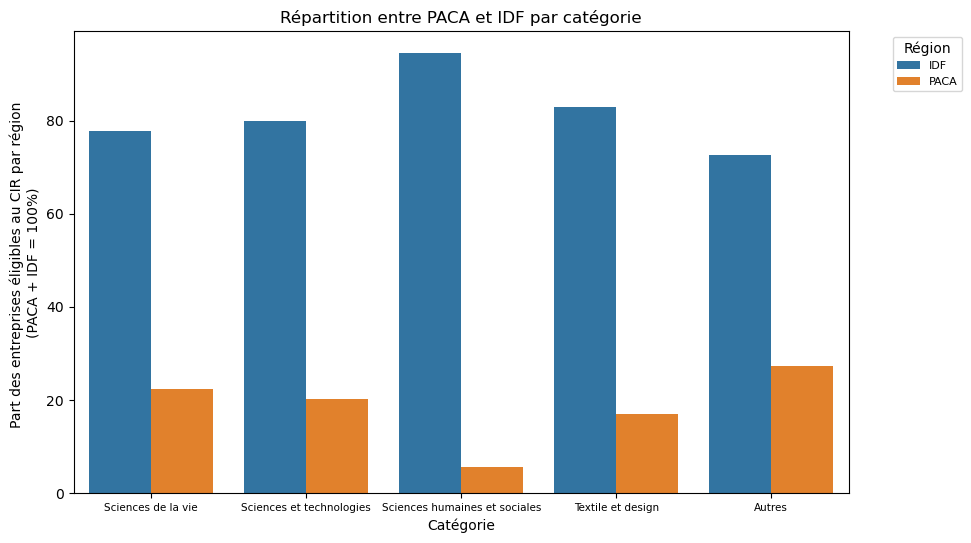

In [199]:
# Compter le nombre de lignes pour chaque 'Région' et chaque 'Categorie'
data_region_categorie = data_categorie.groupby(['Catégorie', 'Région']).size().reset_index(name='count')

data_region_categorie_pourcentage = data_count_entreprise.copy()

# Appliquer la fonction de catégorisation
data_region_categorie_pourcentage['Catégorie'] = data_region_categorie_pourcentage['Activité'].apply(categoriser_activite)

# Group by 'Région' & 'Catégorie'

data_region_categorie_pourcentage = data_region_categorie_pourcentage.groupby(['Catégorie','Région']).size().reset_index(name='count')


# Calculer la somme des 'count' pour chaque 'Catégorie'
somme_data_region_categorie = data_region_categorie_pourcentage.groupby('Catégorie')['count'].transform('sum')

# Ajouter une nouvelle colonne 'Pourcentage' au DataFrame
data_region_categorie_pourcentage['Pourcentage'] = (data_region_categorie_pourcentage['count'] / somme_data_region_categorie) * 100


# Réorganiser l'ordre des catégories pour que "Autres" soit en dernier
ordre_categories = sorted(data_region_categorie_pourcentage['Catégorie'].unique())
ordre_categories.remove('Autres')  # Retirer "Autres" pour l'ajouter manuellement à la fin
ordre_categories.append('Autres')  # Ajouter "Autres" à la fin

data_region_categorie_pourcentage['Catégorie'] = pd.Categorical(
    data_region_categorie_pourcentage['Catégorie'], 
    categories=ordre_categories, 
    ordered=True
)


# Création du graphique
plt.figure(figsize=(10, 6))
sns.barplot(data=data_region_categorie_pourcentage, x='Catégorie', y='Pourcentage', hue='Région')
plt.title("Répartition entre PACA et IDF par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Part des entreprises éligibles au CIR par région \n(PACA + IDF = 100%)")
plt.xticks(fontsize = 7.5)
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, title_fontsize=10)

plt.show()

#### La région PACA affiche un retard prononcé dans toutes les catégories comparé à la région Île-de-France.

<br>

## Catégorie Année par année :

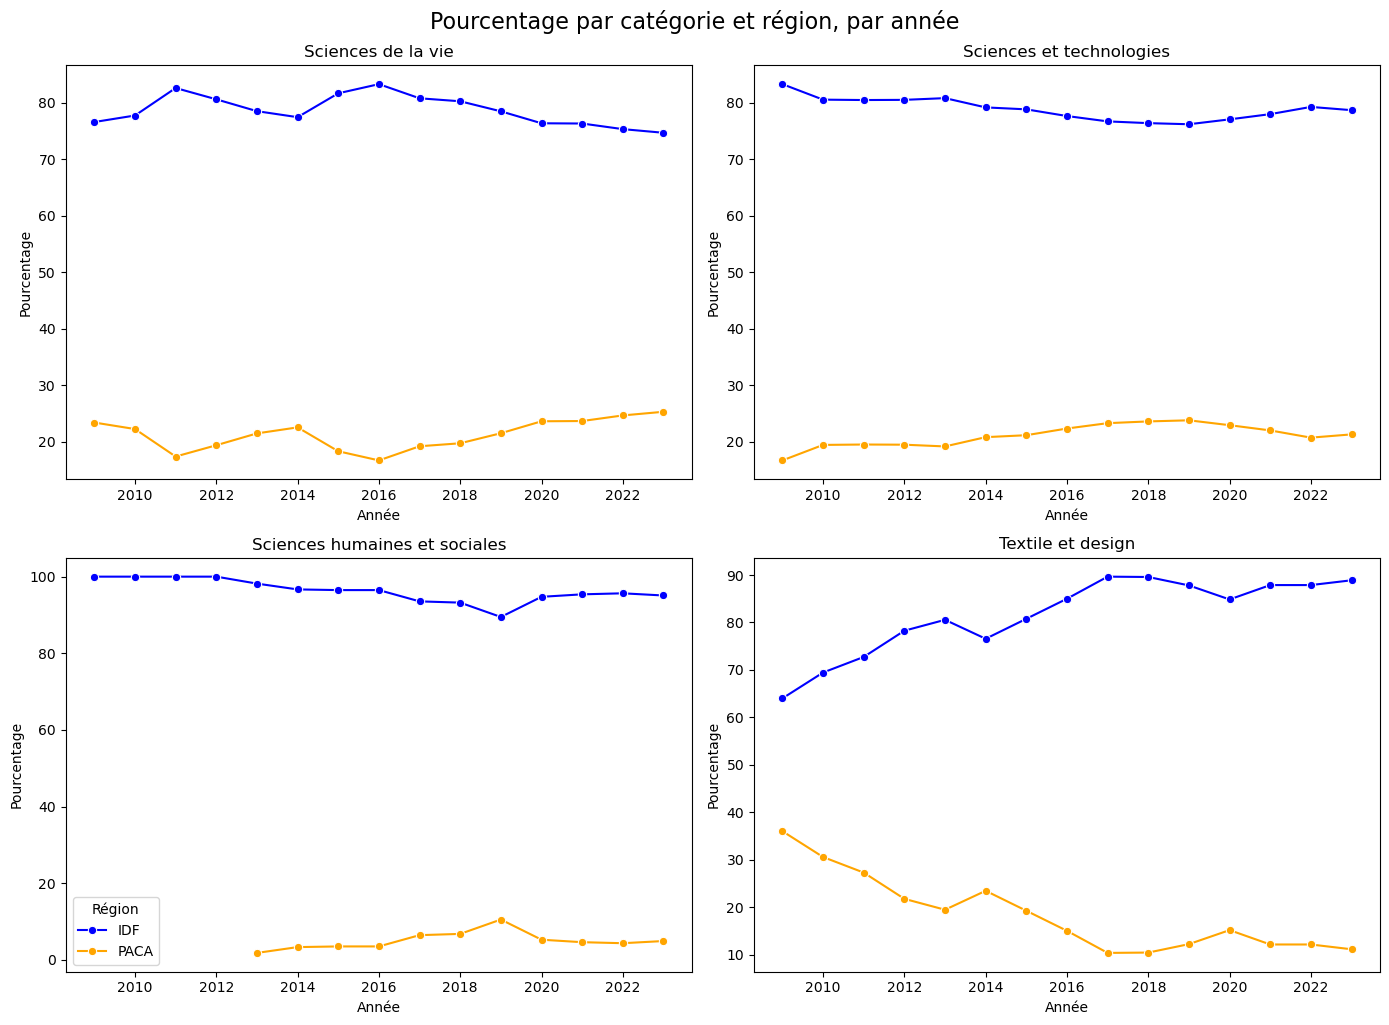

In [201]:
# Liste des 'Catégorie' uniques
unique_categorie = data_region_categorie['Catégorie'].unique()

data_categorie_annee = data_categorie.groupby(['Région','Annee','Catégorie']).size().reset_index(name='count')

for categorie in unique_categorie:
    
    # Filtrer les données pour la 'Catégorie'
    
    data_filtre = data_categorie_annee[data_categorie_annee['Catégorie'] == categorie]
    
data_categorie_annee_pourcentage = data_categorie_annee.copy()

# Calculer la somme des 'count' pour chaque 'Catégorie'
somme_data_categorie_annee = data_categorie_annee_pourcentage.groupby(['Catégorie','Annee'])['count'].transform('sum')

# Ajouter une nouvelle colonne 'Pourcentage' au DataFrame
data_categorie_annee_pourcentage['Pourcentage'] = (data_categorie_annee_pourcentage['count'] / somme_data_categorie_annee) * 100

# Filtre sur les 'Categorie' d'interets
categories_interessees = ['Sciences de la vie', 'Sciences et technologies', 
                          'Sciences humaines et sociales', 'Textile et design']

data_categorie_annee_pourcentage = data_categorie_annee_pourcentage[(data_categorie_annee_pourcentage['Catégorie'].isin(categories_interessees))]


# Configurer la figure avec 4 sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Couleurs pour les régions
couleurs = {"IDF": "blue", "PACA": "orange"}

# Créer un graphique pour chaque catégorie
for i, categorie in enumerate(categories_interessees):
    ax = axes[i]
    
    # Filtrer les données pour la catégorie courante
    data_categorie = data_categorie_annee_pourcentage[data_categorie_annee_pourcentage['Catégorie'] == categorie]
    
    # Tracer les courbes pour IDF et PACA
    for region, couleur in couleurs.items():
        sns.lineplot(
            data=data_categorie[data_categorie['Région'] == region], 
            x='Annee', y='Pourcentage', marker='o', label=region, color=couleur, ax=ax
        )
    
    # Ajouter des titres
    ax.set_title(categorie)
    ax.set_xlabel('Année')
    
    # Afficher l'étiquette de l'axe Y pour les graphiques de gauche
    if i % 2 == 0:
        ax.set_ylabel('Pourcentage')
    
    # Afficher la légende uniquement pour "Sciences et technologies"
    if categorie == "Sciences humaines et sociales":
        ax.legend(title="Région")
    else:
        ax.get_legend().remove()  # Supprimer la légende pour les autres graphiques

# Ajuster la disposition des sous-graphiques
plt.tight_layout()
plt.suptitle("Pourcentage par catégorie et région, par année", fontsize=16, y=1.02)  # Titre global

plt.show()



#### On n'observe aucun rattrapage de la région PACA sur la région Île-de-France au cours du temps.

<br>

## Cartographie :

In [218]:

data_count_entreprise_carto = data_count_entreprise.copy()

# Appliquer la fonction de catégorisation

data_count_entreprise_carto['Catégorie'] = data_count_entreprise_carto['Activité'].apply(categoriser_activite)

# Nettoyer la colonne 'Géolocalisation' pour obtenir latitude et longitude
data_count_entreprise_carto['Latitude'] = data_count_entreprise_carto['Géolocalisation'].apply(
    lambda x: float(x.split(',')[0].strip()) if pd.notnull(x) else None
)
data_count_entreprise_carto['Longitude'] = data_count_entreprise_carto['Géolocalisation'].apply(
    lambda x: float(x.split(',')[1].strip()) if pd.notnull(x) else None
)

# Filtrer les données pour PACA et IDF avec des coordonnées valides
data_filtered = data_count_entreprise_carto[
    (data_count_entreprise_carto['Région'].isin(['IDF', 'PACA']))
].dropna(subset=['Latitude', 'Longitude'])

# Associer des couleurs fixes à chaque catégorie
category_colors = {
    "Sciences et technologies": "#1f77b4",  # Bleu
    "Sciences de la vie": "#2ca02c",        # Vert
    "Sciences humaines et sociales": "#ff7f0e",  # Orange
    "Textile et design": "#d62728",         # Rouge
    "Autres": "#9467bd"                    # Violet
}

# Définir les centres des cartes pour chaque région
region_centers = {
    "IDF": [48.8566, 2.3522],  # Paris, centre de l'Île-de-France
    "PACA": [43.9352, 6.0679]  # Position approximative pour la région PACA
}

# Fonction pour ajouter une légende HTML
def add_legend(map_object, category_colors):
    legend_html = """
    <div style="
        position: fixed; 
        bottom: 30px; left: 30px; width: 250px; height: auto; 
        background-color: white; 
        border:2px solid grey; z-index:9999; font-size:14px;
        padding: 10px; border-radius: 10px;">
        <b>Code couleur - Catégories</b><br>
    """
    for category, color in category_colors.items():
        legend_html += f"<div style='margin-bottom: 5px;'><i style='background:{color};width:15px;height:15px;display:inline-block;margin-right:10px;'></i>{category}</div>"
    legend_html += "</div>"
    map_object.get_root().html.add_child(branca.element.Element(legend_html))

# Boucle pour créer une carte pour chaque région
for region in ['IDF', 'PACA']:
    # Filtrer les données pour la région en cours
    data_region = data_filtered[data_filtered['Région'] == region]
    
    # Échantillonner les données si trop de points (optionnel)
    #if len(data_region) > 1000:  # Limiter à 1000 points pour lisibilité
    #    data_region = data_region.sample(1000, random_state=42)
    
    # Créer une carte centrée sur la région correspondante
    center = region_centers[region]
    m = folium.Map(location=center, zoom_start=8)
    
    # Ajouter des marqueurs pour chaque entreprise
    for idx, row in data_region.iterrows():
        category = row['Catégorie']
        color = category_colors.get(category, '#000000')  # Noir par défaut si non défini
        
        # Ajouter un cercle avec une taille réduite
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=3,  # Taille du point
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,  # Transparence
            popup=f"Entreprise: {row.get('Désignation', 'N/A')}\nRégion: {row['Région']}\nCatégorie: {category}"
        ).add_to(m)
    
    # Ajouter la légende
    add_legend(m, category_colors)
    
    # Sauvegarder la carte pour chaque région dans un fichier HTML
    m.save(f"carte_{region}.html")
    print(f"Carte pour la région {region} générée et sauvegardée sous 'carte_{region}.html'")

Carte pour la région IDF générée et sauvegardée sous 'carte_IDF.html'
Carte pour la région PACA générée et sauvegardée sous 'carte_PACA.html'
